# Data set 2: simulated data

This data set is used to show:

- that shape descriptors result in **biased** shape space

- how to create a **mapping from parameter space** to morph space


In [1]:
%matplotlib inline
import matplotlib.pylab as plt
import os, sys, glob
import pandas as pd

# display animations as html5 videos
from IPython.display import HTML
from matplotlib import rc
rc('animation', html='html5')

# load cellshapy (autoreload only for development)
%load_ext autoreload
%autoreload 2

src_folder = '..' 
if src_folder not in sys.path:
    sys.path.append(os.path.abspath(src_folder))

import cellshapy

Reading config from /home/debacwa/.config/cellshapy


/home/debacwa/Work/cellshapy/cellshapy/config/features.py:23: UserWarning: Package mahotas is missing. Some features are not available


In [2]:
cellshapy.config

DEFAULT
print
  limit.videocollection = 3
  limit.video = 2
  debug = False
plotting
  height = 300
  width = 250
  duration = 5.0
contours
  n_points = 50
  smoothing = 0

# Generate / import data

In [11]:
#data_folder = '/home/debacwa/Simulation/Example-Protrusion_sweep_3'
data_folder = '/home/debacwa/Simulation/Example-Protrusion_sweep_7'
#data_folder = '/Volumes/USB-WDB/cellshapy/simulated/Example-Protrusion_sweep_117'
#data_folder = '/Users/wdeback/Simulation/Example-Protrusion_sweep_118'
df_sweepdata = pd.read_csv(os.path.join(data_folder, 'sweep_data.csv'), sep='\t')
df_sweepdata

Folder   P1   P2  P3
0   Example-Protrusion_sweep_7/Example-Protrusion_334  1.0   75   1
1   Example-Protrusion_sweep_7/Example-Protrusion_335  1.0   75   2
2   Example-Protrusion_sweep_7/Example-Protrusion_336  1.0   75   3
3   Example-Protrusion_sweep_7/Example-Protrusion_337  1.0   75   4
4   Example-Protrusion_sweep_7/Example-Protrusion_338  1.0   75   5
5   Example-Protrusion_sweep_7/Example-Protrusion_339  1.0   75   6
6   Example-Protrusion_sweep_7/Example-Protrusion_340  1.0   75   7
7   Example-Protrusion_sweep_7/Example-Protrusion_341  1.0   75   8
8   Example-Protrusion_sweep_7/Example-Protrusion_342  1.0   75   9
9   Example-Protrusion_sweep_7/Example-Protrusion_343  1.0   75  10
10  Example-Protrusion_sweep_7/Example-Protrusion_344  1.0  150   1
11  Example-Protrusion_sweep_7/Example-Protrusion_345  1.0  150   2
12  Example-Protrusion_sweep_7/Example-Protrusion_346  1.0  150   3
13  Example-Protrusion_sweep_7/Example-Protrusion_347  1.0  150   4
14  Example-Protrusion_sweep_7/Example-Protrusion_348  1.0  150   5
15  Example-Protrusion_sweep_7/Example-Protrusion_349  1.0  150   6
16  Example-Protrusion_sweep_7/Example-Protrusion_350  1.0  150   7
17  Example-Protrusion_sweep_7/Example-Protrusion_351  1.0  150   8
18  Example-Protrusion_sweep_7/Example-Protrusion_352  1.0  150   9
19  Example-Protrusion_sweep_7/Example-Protrusion_353  1.0  150  10
20  Example-Protrusion_sweep_7/Example-Protrusion_354  1.7   75   1
21  Example-Protrusion_sweep_7/Example-Protrusion_355  1.7   75   2
22  Example-Protrusion_sweep_7/Example-Protrusion_356  1.7   75   3
23  Example-Protrusion_sweep_7/Example-Protrusion_357  1.7   75   4
24  Example-Protrusion_sweep_7/Example-Protrusion_358  1.7   75   5
25  Example-Protrusion_sweep_7/Example-Protrusion_359  1.7   75   6
26  Example-Protrusion_sweep_7/Example-Protrusion_360  1.7   75   7
27  Example-Protrusion_sweep_7/Example-Protrusion_361  1.7   75   8
28  Example-Protrusion_sweep_7/Example-Protrusion_362  1.7   75   9
29  Example-Protrusion_sweep_7/Example-Protrusion_363  1.7   75  10
30  Example-Protrusion_sweep_7/Example-Protrusion_364  1.7  150   1
31  Example-Protrusion_sweep_7/Example-Protrusion_365  1.7  150   2
32  Example-Protrusion_sweep_7/Example-Protrusion_366  1.7  150   3
33  Example-Protrusion_sweep_7/Example-Protrusion_367  1.7  150   4
34  Example-Protrusion_sweep_7/Example-Protrusion_368  1.7  150   5
35  Example-Protrusion_sweep_7/Example-Protrusion_369  1.7  150   6
36  Example-Protrusion_sweep_7/Example-Protrusion_370  1.7  150   7
37  Example-Protrusion_sweep_7/Example-Protrusion_371  1.7  150   8
38  Example-Protrusion_sweep_7/Example-Protrusion_372  1.7  150   9
39  Example-Protrusion_sweep_7/Example-Protrusion_373  1.7  150  10

In [12]:
df_sweepdata['class'] = -1

for i, (index, row) in enumerate(df_sweepdata.iterrows()):
    df_sweepdata['class'].iloc[i] = i//10

df_sweepdata.head()

/home/debacwa/miniconda3/envs/cellshapy/lib/python3.6/site-packages/pandas/core/indexing.py:189: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


Folder   P1  P2  P3  class
0  Example-Protrusion_sweep_7/Example-Protrusion_334  1.0  75   1      0
1  Example-Protrusion_sweep_7/Example-Protrusion_335  1.0  75   2      0
2  Example-Protrusion_sweep_7/Example-Protrusion_336  1.0  75   3      0
3  Example-Protrusion_sweep_7/Example-Protrusion_337  1.0  75   4      0
4  Example-Protrusion_sweep_7/Example-Protrusion_338  1.0  75   5      0

In [13]:
annotations = [{'p1': p1, 'p2': p2, 'class': c} for (p1, p2, c) in zip(df_sweepdata['P1'].values, df_sweepdata['P2'].values, df_sweepdata['class'].values)]
annotations

[{'p1': 1.0, 'p2': 75, 'class': 0},
 {'p1': 1.0, 'p2': 75, 'class': 0},
 {'p1': 1.0, 'p2': 75, 'class': 0},
 {'p1': 1.0, 'p2': 75, 'class': 0},
 {'p1': 1.0, 'p2': 75, 'class': 0},
 {'p1': 1.0, 'p2': 75, 'class': 0},
 {'p1': 1.0, 'p2': 75, 'class': 0},
 {'p1': 1.0, 'p2': 75, 'class': 0},
 {'p1': 1.0, 'p2': 75, 'class': 0},
 {'p1': 1.0, 'p2': 75, 'class': 0},
 {'p1': 1.0, 'p2': 150, 'class': 1},
 {'p1': 1.0, 'p2': 150, 'class': 1},
 {'p1': 1.0, 'p2': 150, 'class': 1},
 {'p1': 1.0, 'p2': 150, 'class': 1},
 {'p1': 1.0, 'p2': 150, 'class': 1},
 {'p1': 1.0, 'p2': 150, 'class': 1},
 {'p1': 1.0, 'p2': 150, 'class': 1},
 {'p1': 1.0, 'p2': 150, 'class': 1},
 {'p1': 1.0, 'p2': 150, 'class': 1},
 {'p1': 1.0, 'p2': 150, 'class': 1},
 {'p1': 1.7, 'p2': 75, 'class': 2},
 {'p1': 1.7, 'p2': 75, 'class': 2},
 {'p1': 1.7, 'p2': 75, 'class': 2},
 {'p1': 1.7, 'p2': 75, 'class': 2},
 {'p1': 1.7, 'p2': 75, 'class': 2},
 {'p1': 1.7, 'p2': 75, 'class': 2},
 {'p1': 1.7, 'p2': 75, 'class': 2},
 {'p1': 1.7, 'p2':

## Load from image files

In [14]:
#fns = [os.path.join(data_folder, '..', folder, 'cell.tif') for folder in df_sweepdata['Folder']]
#vc = cellshapy.VideoCollection.from_filenames(fns, annotations=annotations, composite=True)

In [15]:
# load images and exclude first 10 frames
from skimage.external import tifffile
fns = [os.path.join(data_folder, '..', folder, 'cell.tif') for folder in df_sweepdata['Folder']]
#ims = [tifffile.imread(fn)[53:] for fn in fns]
ims = [tifffile.imread(fn)[2:] for fn in fns]


### save dataset

In [16]:
# save video files
dest_folder = '/data/debacwa/cellshapy/dataset-simulation-3'
for i, video in enumerate(ims):
    outfilename = os.path.join(dest_folder, f'video_{i:03}.tif')
    tifffile.imsave(outfilename, video, compress=6)
    print(f'saved {outfilename}')

saved /data/debacwa/cellshapy/dataset-simulation-3/video_000.tif
saved /data/debacwa/cellshapy/dataset-simulation-3/video_001.tif
saved /data/debacwa/cellshapy/dataset-simulation-3/video_002.tif
saved /data/debacwa/cellshapy/dataset-simulation-3/video_003.tif
saved /data/debacwa/cellshapy/dataset-simulation-3/video_004.tif
saved /data/debacwa/cellshapy/dataset-simulation-3/video_005.tif
saved /data/debacwa/cellshapy/dataset-simulation-3/video_006.tif
saved /data/debacwa/cellshapy/dataset-simulation-3/video_007.tif
saved /data/debacwa/cellshapy/dataset-simulation-3/video_008.tif
saved /data/debacwa/cellshapy/dataset-simulation-3/video_009.tif
saved /data/debacwa/cellshapy/dataset-simulation-3/video_010.tif
saved /data/debacwa/cellshapy/dataset-simulation-3/video_011.tif
saved /data/debacwa/cellshapy/dataset-simulation-3/video_012.tif
saved /data/debacwa/cellshapy/dataset-simulation-3/video_013.tif
saved /data/debacwa/cellshapy/dataset-simulation-3/video_014.tif
saved /data/debacwa/cells

In [17]:
# save annotations
import pandas as pd
df = pd.DataFrame.from_dict(annotations)
outfilename = os.path.join(dest_folder, 'annotation.csv')
df.to_csv(outfilename)

Creating VideoCollection from list of 40 arrays. video files or directories



Iteration 2, error: 0.000018, time: 5.21 sec
3960 contours aligned in 7.70 sec


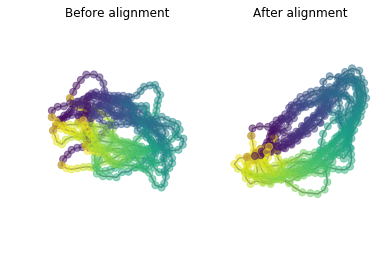

In [31]:
vc = cellshapy.VideoCollection.from_arrays(ims, annotations=annotations, normalize_distances=False)
_ = vc.align_contours()

---- 

In [ ]:
#from IPython.display import HTML
#HTML(vc.show())

# Test CVAE

In [ ]:
vc.embed_morphs('stxy', 'vae', n_components=64, verbose=False)

In [ ]:
fig  = vc.morph_space('stxy', 'vae', projection='umap', colorcode='p1', shape_size=1.0, animate=False, frames=[10,20])

In [ ]:
anim = vc.morph_space('stxy', 'vae', projection='pca', colorcode='p2', shape_size=1.0)
anim

In [ ]:
#fig = vc.morph_space('stxy', 'vae', projection='umap', colorcode='p1', shape_size=1.0, animate=False, frames=[10,20])

In [ ]:
#fig = vc.morph_space('stxy', 'vae', projection=None, shape_size=1.0, animate=False, frames=[10,20])

### Reconstruct a sample

In [ ]:
vc.embed_object

In [ ]:
s = -2
# get sample of dynamic shape
sample = vc.get_contours(per_sample=True, aligned=True)[s:s+1]

print(sample.shape)

# reshape to get x and y coordinates in sigle axis
import numpy as np
sample = np.reshape(sample, (*sample.shape[:2], -1), order='F' )

print(sample.shape)

# zero-padding
#sample = [vc.embed_object['stxy', 'vae'].pad_to_next_divisible(s) for s in sample]

for s in sample:
    print(s.shape)

# encode it
encoding = vc.embed_object['stxy', 'vae'].transform( sample )
print(encoding)


# decode it
reconstruction = vc.embed_object['stxy', 'vae'].inverse_transform( encoding )

print(reconstruction.shape)

# plot matrices
fig, ax = plt.subplots(1,3,figsize=(15,5))
ax[0].set_title('Original')
p = ax[0].imshow(sample[0])
fig.colorbar(p, ax=ax[0], shrink=0.75)

ax[1].set_title('Reconstruction')
p = ax[1].imshow(reconstruction[0])
fig.colorbar(p, ax=ax[1], shrink=0.75)

ax[2].set_title('Error')
p = ax[2].imshow(sample[0]-reconstruction[0], cmap='bwr')
fig.colorbar(p, ax=ax[2], shrink=0.75)
plt.show()

# animate original and reconstructed contour
contour = cellshapy.analysis.embedding.tensor_to_contours(sample, format='stxy')
cellshapy.plotting.polygon.animate_contour(np.squeeze(contour), duration=3)
plt.show()

contour = cellshapy.analysis.embedding.tensor_to_contours(reconstruction, format='stxy')
cellshapy.plotting.polygon.animate_contour(np.squeeze(contour), duration=3)
plt.show()

## clustering

In [ ]:
df = vc.cluster_morphs('stxy', method='parafac', cl_method='hdbscan', n_clusters=5, plot=True)
df.head()

In [ ]:
fig = vc.morph_space('stxy', 'parafac', projection='umap', colorcode='cluster', shape_size=1.0, animate=False, frames=[10, 20, 29])

In [ ]:
fig = vc.morph_space('stxy', 'vae', projection='pca', colorcode='cluster', shape_size=1.0, animate=False, frames=[10, 20, 29])

# Compare to Parafac

In [ ]:
vc.embed_morphs('stxy', 'parafac', n_components=2, verbose=False, save_embedding=True)
fig = vc.morph_space('stxy', 'parafac', projection='pca', shape_size=1.0, colorcode='p1', animate=False, frames=[10,20])

In [ ]:
@vc.compare_embeddings(('stxy', 'parafac'), ('stxy', 'vae'))

In [ ]:
_ = vc.morph_space_reconstruction('stxy', 'parafac', num_points=5)

### VAE using the internal API
To test reconstruction

In [ ]:
from cellshapy.analysis import embedding, cvae
tensor = embedding.videos_to_tensor(vc, 'stxy')
tensor.shape

In [ ]:
#tensor = np.random.random((2,24,24)).astype(np.float32)

In [ ]:
from cellshapy.analysis import cvae
autoencoder = cvae.CVAE(latent_dim=64, filters=12, batch_size=48, epochs=1000, tensor=tensor, verbose=False, beta=5.0)
autoencoder.fit()

In [ ]:
embedding = autoencoder.transform(tensor)
embedding.shape

In [ ]:
from cellshapy.analysis.embedding import pca
plt.scatter(*pca(embedding).T)

In [ ]:
n = 10
sample = embedding[n:n+1]
reconstruction = autoencoder.inverse_transform(sample)
reconstruction.shape
print(tensor[n:n+1].max())
plt.imshow(np.squeeze(tensor[n:n+1]))
plt.show()
print(reconstruction.max())
plt.imshow(np.squeeze(reconstruction))

-----

In [ ]:
from cellshapy.utils.contours import extract_shape_descriptors
_ = vc[-1][-1].extract_shape_descriptors(plot=True, skeleton=True)


---

# Shape embedding: show bias

- vary the number of descriptors included in the shape space
- take e.g. 100 samples of all possible combinations of a given length
- measure the RSME embedding[('descriptors', 'pca')] from the embedding[('contours', 'pca')]

In [ ]:
# ground truth embedding
videos.embed_shapes(source='contours', method='pca', n_components=2)

In [ ]:
descriptors = videos.get_descriptors().columns
descriptors = [d for d in descriptors if d not in ['frame', 'video'] ]
from itertools import combinations
len(descriptors)

In [ ]:
from cellshapy.config import tqdm
import numpy as np
max_number_of_samples = 50

results = []
for l in tqdm(range(2,len(descriptors),3)):
    # get all combinations of desciptors
    descriptor_combination = list(combinations(descriptors, l))
    # take a random sample of these descriptor combinations
    indices = np.random.choice(range(len(descriptor_combination)), min([max_number_of_samples, len(descriptor_combination)]))
    for i in tqdm(indices):
        # for the sample of descriptor combinations, do a PCA to 2 components
        videos.embed_shapes(source='descriptors', method='pca', n_components=2, include=descriptor_combination[i], verbose=False)
        # compare embedding with the 'ground truth' embedding and calculate the RSME
        mae = videos.compare_embeddings(('contours', 'pca'), ('descriptors', 'pca'), plot=False)
        # put in dataframe
        results.append({'number of descriptors': l, 
                        'descriptors':descriptor_combination[i],
                        'mae':mae})
df_descriptors = pd.DataFrame(results)
df_descriptors.head()


In [ ]:
#df_descriptors

In [ ]:
import seaborn as sns
ax = sns.boxplot(data=df_descriptors, x='number of descriptors', y='mae')
ax = sns.swarmplot(data=df_descriptors, x='number of descriptors', y='mae', color='k', alpha=0.5, zorder=10)
#sns.violinplot(data=df_descriptors, x='number of descriptors', y='rsme', color='k', alpha=0.5)
#plt.scatter(df_descriptors['number of descriptors'], df_descriptors['rsme'])

In [ ]:
# create a plot with a sample with half of the available descriptors
list_of_descriptors = df_descriptors.iloc[len(df_descriptors)//2]['descriptors']
print(len(list_of_descriptors))
videos.embed_shapes(source='descriptors', method='pca', n_components=2, include=list_of_descriptors, verbose=False)
videos.compare_embeddings(('contours', 'pca'), ('descriptors', 'pca'), plot=False)

_ = videos.shape_space('contours', 'pca', shape_size=2)
_ = videos.shape_space('descriptors', 'pca', shape_size=2)

# Morph space

In [ ]:
videos.embed_morphs(format='stxy', method='parafac', n_components=2, save_embedding=True)
videos.parafac_diagnostics('stxy', max_components=8)

In [ ]:
# Mapping between parameter space and morph space

In [ ]:
import matplotlib
matplotlib.rc('font', size=20)

from cellshapy.plotting.polygon import polygon


fig, ax = plt.subplots(1,1,figsize=(10,10))
fig.tight_layout()

def norm(val, vmin, vmax):
    return (float(val) - vmin) / float(vmax - vmin)

xmin, ymin = 999.,999.
xmax, ymax = -1.,-1.
for annotation in annotations:
    x,y = (annotation['p1'], annotation['p2'])
    xmax = max(x, xmax)
    ymax = max(y, ymax)
    xmin = min(x, xmin)
    ymin = min(y, ymin)
vmin, vmax = ymin, ymax
print(vmin, vmax)

shape_size = 4
scale = shape_size * min(xmax-xmin, xmax-xmin) / 1e6
xscale = scale*(xmax-xmin)
yscale = scale*(ymax-ymin)
print(xscale, yscale)

for annotation, video in zip(annotations, videos):
    x,y = (annotation['p1'], annotation['p2'])
    #print(pos)
    value = y
    #color_edge = plt.cm.viridis(norm(value, vmin=vmin, vmax=vmax), alpha=1.)
    color_edge = (0,0,0,0.8)
    color_face = plt.cm.viridis(norm(value, vmin=vmin, vmax=vmax), alpha=0.7)
    for frame in [50,60]:
        p = polygon(video[frame].contour_aligned, position=(x,y), scale=(xscale,yscale), 
                    color_face=color_face, color_edge=color_edge)
        ax.add_patch(p)
ax.set_xlim([0,xmax*1.1])
ax.set_ylim([0.9,ymax*1.05])
ax.set_xlabel('Parameter 1')
ax.set_ylabel('Parameter 2')


# Hide the right and top spines
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
# Only show ticks on the left and bottom spines
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')

plt.show()
fig.savefig('../simulations_paramaters.pdf', dpi=300)

In [ ]:
videos.embed_morphs(format='stxy', method='parafac', n_components=2, save_embedding=True)
#fig = videos.morph_space(format='stxy', method='parafac', 
#                      animate=False, frames=[25,50,75,99],
#                      shape_size=5.0, duration=5.0, alpha_face=0.2, 
#                      colorcode='p2')

fig = videos.morph_space(format='stxy', method='parafac', animate=False, frames=[50,60],
                      shape_size=3.0, alpha_face=0.7, alpha_edge=0.8, 
                      colorcode='p2')
fig.savefig('../simulations_parafac.pdf', dpi=300)

In [ ]:
def normalize(p):
    return (p - p.min()) / (p.max() - p.min())

positions1 = np.array([(a['p1'], a['p2']) for a in annotations])
positions1[:,0] = normalize(positions1[:,0])
positions1[:,1] = normalize(positions1[:,1])
#positions1 -= positions1.mean(axis=0)
#positions1 /= positions1.std(axis=0)
#positions1 = [list(p) for p in positions1]
positions2 = np.array(videos.embedding[('stxy', 'parafac')][0])
positions2[:,0] = normalize(positions2[:,0])
positions2[:,1] = normalize(positions2[:,1])
#positions2 -= positions2.mean(axis=0)
#positions2 /= positions2.std(axis=0)
#positions2 = [list(p) for p in positions2]

arrows = np.concatenate([positions1, positions2], axis=1)
lines = list(zip(positions2, positions1))
#for line in lines:
#    print(line)

values = np.array([(a['p2']) for a in annotations])
fig, ax = plt.subplots(1,1,figsize=(10,10))


ax.scatter(positions1[:,0], positions1[:,1], s=50, c=values, marker='o', alpha=1)
ax.scatter(positions2[:,0], positions2[:,1], s=100, c=values,  marker='s', zorder=-1, edgecolor='k')#, alpha=0.5)

import matplotlib.colors as colors
import matplotlib.cm as cmx
cmap = plt.cm.viridis
cNorm  = colors.Normalize(vmin=np.min(values), vmax=np.max(values))
scalarMap = cmx.ScalarMappable(norm=cNorm,cmap=cmap)

velocities = []
for i, line in enumerate(lines):
    t = line[0]
    x, y = line[1]
    dx = t[0]-x
    dy = t[1]-y
    velocities.append([dx,dy])
    #ax.arrow(x, y, dx, dy, head_width=0.0, lw=0.1,  linestyle='dotted', color=scalarMap.to_rgba(values[i]), alpha=1, zorder=-2)
    dx *= 0.2#0.25
    dy *= 0.2#0.25
    ax.arrow(x, y, dx, dy, head_width=0.01, lw=3, color=scalarMap.to_rgba(values[i]), alpha=1)

ax.set_xlabel('')
ax.set_ylabel('')
ax.set_xticks([])
ax.set_yticks([])
# Hide the right and top spines
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
# Only show ticks on the left and bottom spines
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')


ax.autoscale()
#ax.margins(0.1)

fig.savefig('../simulations_mapping.pdf', dpi=300)

In [ ]:
videos.shape_space_correlate_with_features('contours', 'pca', num_points=10)

In [ ]:
_ = videos.polar_shape_space('contours', 'pca', num_bins=12, shape_size=10, label_threshold=0.0)

In [ ]:
_, recon_shapes, recon_pos = videos.shape_space_reconstruction('contours', 'pca', num_points=12, num_dimensions=2, shape_size=10, alpha_face=0.5, alpha_edge=1.0, return_contours=True)

In [ ]:
_ = recon.shape_space_reconstruction_descriptors('contours', 'pca', num_points=12, num_dimensions=2, shape_size=10, alpha_face=0.5, alpha_edge=1.0)